In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
austData = pd.read_csv('AustinCityLimits.csv')

In [3]:
austData.head()

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
0,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0.0,101870.0,1.0,113576,1
1,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1.0,73313.0,0.0,298278,1
2,Allen Toussaint,2009,January,winter,M,75,Fifties or Older,N,Jazz/Blues,NaN,308634.0,1.0,10721,0
3,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1.0,56343.0,0.0,318313,1
4,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1.0,404439.0,1.0,1711685,1


In [4]:
austData.shape

(116, 14)

### How many of the first 10 artists in the dataset were Grammy winners?

In [5]:
(austData.head(10)['Grammy'] == 'Y').sum()

4

### What genre was played by the first female artist in the dataset who was over 60 years of age?

In [6]:
austData[(austData['Age'] > 60) & (austData['Gender'] == 'F')].head(1)['Genre']

9    Jazz/Blues
Name: Genre, dtype: object

## The Question:  For artists age 30 or older, do female artists play different kinds of music on Austin City Limits than male artists?

### Making a subset dataset of singers 30 years old or older.

In [7]:
age_30_or_older = austData[austData['Age'] > 29]

## Make a bar chart to better visualize how many male and female artists played in each genre.

In [8]:
genreTable = pd.crosstab(age_30_or_older['Gender'],age_30_or_older['Genre'])
genreTable

Genre,Country,Jazz/Blues,Rock/Folk/Indie,Singer-Songwriter
Gender,,,,
F,6,4,8,7
M,11,7,53,6


###  The fastest way.

<Axes: xlabel='Gender'>

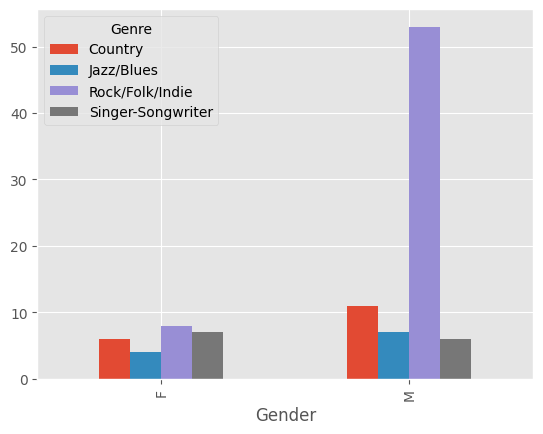

In [9]:
genreTable.plot(kind='bar')

### The count of singers by gender for each music genre.

In [10]:
Fcount = {c: genreTable[c]['F'] for c in genreTable.columns}
Mcount = {c: genreTable[c]['M'] for c in genreTable.columns}

###  The long way

Text(0.5, 1.0, 'Male')

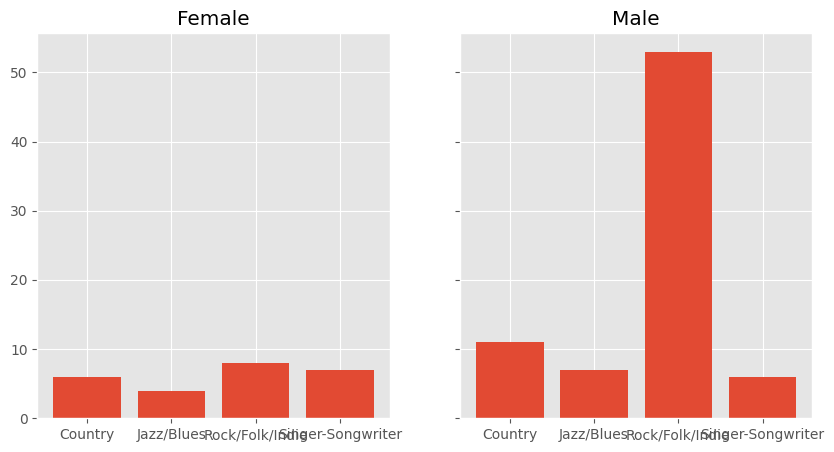

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)

ax[0].bar(list(Fcount.keys()), list(Fcount.values()))
ax[1].bar(list(Mcount.keys()), list(Mcount.values()))

ax[0].set_title('Female')
ax[1].set_title('Male')

### Arranging the DataFrame for plotting more easily.

In [12]:
genreTable_stacked = genreTable.stack().reset_index().rename(columns={0:'Counts'})
genreTable_stacked

,Gender,Genre,Counts
0,F,Country,6
1,F,Jazz/Blues,4
2,F,Rock/Folk/Indie,8
3,F,Singer-Songwriter,7
4,M,Country,11
5,M,Jazz/Blues,7
6,M,Rock/Folk/Indie,53
7,M,Singer-Songwriter,6


### The best way IMO.

<Axes: xlabel='Genre', ylabel='Counts'>

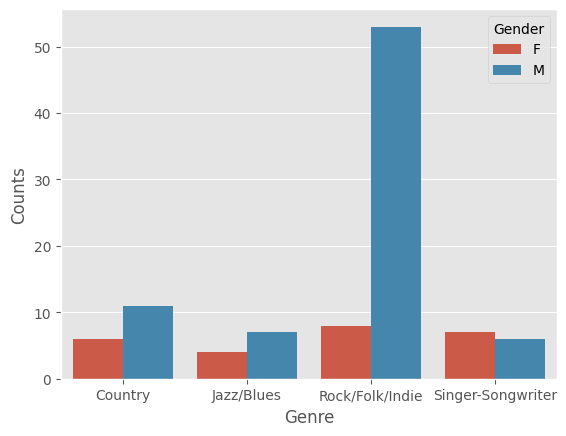

In [13]:
sns.barplot(x='Genre', y='Counts', hue='Gender', data=genreTable_stacked)

### Probability of each music genre being played.

In [14]:
genreCount = genreTable.sum(0) # count of the ocurrence of each gender
genreProb = genreCount / genreCount.sum()
genreProb

Genre
Country              0.166667
Jazz/Blues           0.107843
Rock/Folk/Indie      0.598039
Singer-Songwriter    0.127451
dtype: float64

### Probability of each music genre being played given the singer's gender.

Remember that the genreTable variable contains the contigency table/crosstab of the singers gender and the music genre.

In [15]:
# Female
genreProbF = genreTable.loc['F'] / genreTable.loc['F'].sum()
genreProbF

Genre
Country              0.24
Jazz/Blues           0.16
Rock/Folk/Indie      0.32
Singer-Songwriter    0.28
Name: F, dtype: float64

In [16]:
# Male
genreProbM = genreTable.loc['M'] / genreTable.loc['M'].sum()
genreProbM

Genre
Country              0.142857
Jazz/Blues           0.090909
Rock/Folk/Indie      0.688312
Singer-Songwriter    0.077922
Name: M, dtype: float64

In [17]:
# How many male artists are in the 30+ year old artist subset of the Austin City Limits data
genreTable.loc['M'].sum()

77

In [18]:
# How Many females?
genreTable.loc['F'].sum()

25

## The Lab

### Among male artists is there an association between winning a grammy award and the genre of music that the artist plays?

In [19]:
maleArtists = austData[austData['Gender'] == 'M']

In [20]:
grammyGenreTab = pd.crosstab(maleArtists['Grammy'], maleArtists['Genre'])

In [21]:
grammyGenreTab

Genre,Country,Jazz/Blues,Rock/Folk/Indie,Singer-Songwriter
Grammy,,,,
N,4,3,34,5
Y,7,4,22,2


### Probability of a random male artist of winning a grammy.

In [22]:
grammyMprob = grammyGenreTab.loc['Y'].sum() / maleArtists.shape[0]
grammyMprob

0.43209876543209874

In [23]:
probGrammyByGenre = grammyGenreTab.loc['Y'] / grammyGenreTab.sum(0)

In [24]:
probGrammyByGenre

Genre
Country              0.636364
Jazz/Blues           0.571429
Rock/Folk/Indie      0.392857
Singer-Songwriter    0.285714
dtype: float64

### How many artists in the dataset have 100.000 or more likes on Facebook?

In [25]:
popularArtists = austData[austData['Facebook.100k'] == 1]

In [26]:
popularArtists

,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
0,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0.0,101870.0,1.0,113576,1
1,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1.0,73313.0,0.0,298278,1
3,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1.0,56343.0,0.0,318313,1
4,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1.0,404439.0,1.0,1711685,1
6,Avett Brothers,2010,January,winter,M,37,Thirties,N,Rock/Folk/Indie,1.0,125758.0,1.0,563505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Tim McGraw,2013,February,winter,M,46,Forties,Y,Country,1.0,859774.0,1.0,5236511,1
111,Tom Waits,2011,December,winter,M,63,Fifties or Older,N,Singer-Songwriter,1.0,202327.0,1.0,1818741,1
113,Widespread Panic,2011,October,fall,M,51,Fifties or Older,N,Rock/Folk/Indie,0.0,35150.0,0.0,303223,1
114,Wilco,2012,February,winter,M,45,Forties,Y,Rock/Folk/Indie,1.0,118222.0,1.0,569817,1


In [27]:
popularityByAge = popularArtists['Age.Group'].value_counts()
popularityByAge

Age.Group
Thirties            31
Forties             24
Fifties or Older    19
Twenties            11
Name: count, dtype: int64

<Axes: xlabel='Age.Group'>

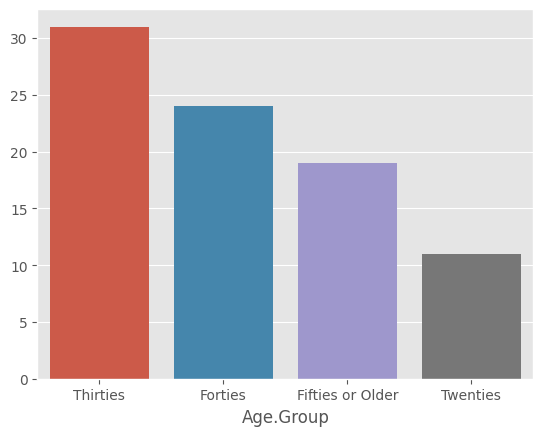

In [28]:
sns.barplot(x=popularityByAge.index, y=popularityByAge.values, hue=popularityByAge.index)

In [29]:
popularityByAgeProportion = popularityByAge / popularityByAge.sum()
popularityByAgeProportion

Age.Group
Thirties            0.364706
Forties             0.282353
Fifties or Older    0.223529
Twenties            0.129412
Name: count, dtype: float64

## Problem Set

## Question 2

In [30]:
studentsData = {
    'A':[5, 8, 11, 9], 
    'B':[10, 10, 5, 9], 
    'C':[9, 9, 4, 4],
    'D':[10, 7, 4, 2],
    'F':[6, 4, 2, 0],
    'Level':['Freshman','Sophomore','Junior','Senior']
}

gradesDf = pd.DataFrame(studentsData)

In [31]:
gradesDf = gradesDf.set_index('Level')
gradesDf

,A,B,C,D,F
Level,,,,,
Freshman,5,10,9,10,6
Sophomore,8,10,9,7,4
Junior,11,5,4,4,2
Senior,9,9,4,2,0


### What proportion of the students received an A?

In [32]:
 gradesDf['A'].sum() / gradesDf.sum(numeric_only=True).sum()

0.2578125

### What proportion of the students where upperclassmen (junior and seniors)?

In [33]:
numJuniors = gradesDf.loc['Junior'].sum()
numSeniors = gradesDf.loc['Senior'].sum()
numAllLevels = gradesDf.sum().sum()
print( (numJuniors + numSeniors) / numAllLevels )

0.390625


### What is the probability that a freshman received a grade of F?

In [34]:
gradesDf.loc['Freshman']['F'] / gradesDf.loc['Freshman'].sum()

0.15

### What is the probability that a randomly selected student from the class would be a sophomore that received a grade of B? 

In [35]:
gradesDf.loc['Sophomore']['B'] / numAllLevels

0.078125

### What proportion of juniors passed the course with a grade of D or better? 

In [36]:
gradesDf.loc['Junior'].drop('F').sum() / numJuniors

0.9230769230769231

### What is the probability that a randomly selected student from this class would be a senior?

In [37]:
numSeniors / numAllLevels

0.1875

###  If a student received a grade of D in the class, what is the probability that the student was a senior?

In [38]:
gradesDf.loc['Senior','D'] / gradesDf['D'].sum()

0.08695652173913043